## Handwritten Digit Recognizer Using Different Algorithms  

## Setting up environment
## Install pywt: 
use command prompt: pip install pywavelets

In [1]:
!pip install pywavelets

In [2]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## Feature Deduction
Firstly, we will reduce the number of feature for each image. Each original image in training dataset has 784 pixels(image).
We will use 2D Forward and Inverse Discrete Wavelet Transform to deduct the features of each image. After transformation,
each image has only 196 features that contain majority information of the original image. We will then use the transformed 
training set to build prediction models.

In [2]:
# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Separate data and labels
data = train.iloc[:,1:]
labels = train.iloc[:,0]

In [4]:
# Check the shape of the data for next steps
data.shape # (42000, 784) -- 784 = 28*28

(42000, 784)

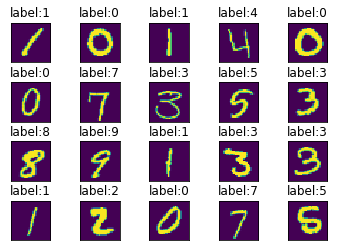

In [5]:
# Plot 20 images by row
for row in range(0,20):
    plt.subplot(4,5,row+1)
    plt.subplots_adjust(hspace = 0.5)
    plt.imshow(data.iloc[row,:].values.reshape(28,28), interpolation = "none")
    plt.gca().set_title('label:' + str(labels[row]))
    plt.xticks([])
    plt.yticks([])

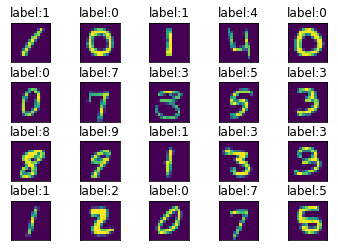

In [6]:
# Reduce data features by 2D Forward and Inverse Discrete Wavelet Transform
# http://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html
for row in range(0,20):
    remained_features = pywt.dwt2(data.iloc[row,:].values.reshape(28,28), wavelet='haar')[0]
    plt.subplot(4,5,row+1)
    plt.subplots_adjust(hspace = 0.5)
    plt.imshow(remained_features, interpolation = "none")
    plt.gca().set_title('label:' + str(labels[row]))
    plt.xticks([])
    plt.yticks([])

In [7]:
# The numbers are still recognizable, so we will use the reduced data to make prediction.
# Transfer all training data
train_transform = []
for all_row in range(len(train)):
    train_transform.append(pywt.dwt2(data.iloc[all_row,:].values.reshape(28,28), wavelet='haar')[0].ravel())
train_transform = pd.DataFrame(train_transform)
new_train = pd.concat([pd.DataFrame(labels), train_transform],axis = 1)
new_train['label'] = new_train['label'].astype(int)
# new_train is the converted training dataset, which only remains 196 converted features that describe the features 
# of each image.

In [8]:
new_train

,label,0,1,2,3,4,5,6,7,8,...,186,187,188,189,190,191,192,193,194,195
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,136.5,106.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Reduction for test dataset
test_transform = []
for all_row in range(len(test)):
    test_transform.append(pywt.dwt2(test.iloc[all_row,:].values.reshape(28,28), wavelet='haar')[0].ravel())
new_test = pd.DataFrame(test_transform)

In [10]:
new_test

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,195
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,36.0,143.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Separate training data into X and Y
trainY = new_train.ix[:,0].values.astype('int32') # label
trainX =(new_train.ix[:,1:].values).astype('float32')

## K Nearest Neighbor

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [14]:
print(trainY.shape)
print(trainX.shape)

(42000,)
(42000, 196)


In [15]:
# We can try out different values of k see which one works the best.
results = []
for k in range(1,40):
    knn_clf = KNeighborsClassifier(n_neighbors = k)
    knn_clf = knn_clf.fit(trainX, trainY)
    scores = cross_val_score(knn_clf, trainX, trainY, cv=5)
    results.append((k,scores.mean(), scores.std()))
    
df_knn = pd.DataFrame(data=results,columns=['k','mean','std'])  

,k,mean,std
0,1,0.969929,0.001644
1,2,0.965714,0.001549
2,3,0.971642,0.002215
3,4,0.970928,0.001951
4,5,0.971571,0.002641
5,6,0.970571,0.002037
6,7,0.970095,0.002149
7,8,0.969643,0.001730
8,9,0.968952,0.001783


In [ ]:
df_knn

In [ ]:
df_knn.plot()

In [15]:
# When n_neighbors = 3, knn_clf has the highest accuracy.
# Fit the model.
knn_clf = KNeighborsClassifier(n_neighbors = 3)
knn_clf = knn_clf.fit(trainX, trainY)

In [ ]:
# Find the accuracy of the model.
knn_clf.score(trainX,trainY)

In [16]:
# Use chosen model to predict and store the prediction.
new_test['Prediction KNN'] = knn_clf.predict(new_test)

In [17]:
new_test

,0,1,2,3,4,5,6,7,8,9,...,187,188,189,190,191,192,193,194,195,Prediction KNN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,143.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


## Boosting

In [7]:
import matplotlib.pyplot as plt
import pydot_ng as pydot # visualization of trees (among many others)
%matplotlib inline

from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

from IPython.display import Image # displaying images files in jupyter
from IPython.display import IFrame # displaying pdf file in jupyter

In [11]:
# Fit the model.
clf_boosting = AdaBoostClassifier(n_estimators=40, learning_rate=0.5)
clf_boosting = clf_boosting.fit(trainX,trainY)

In [ ]:
# Find the accuracy of the model.
clf_boosting.score(trainX,trainY)

In [12]:
# Change n_estimators and use cross validation to find the model that has the highest accuracy.
res_boosting_mean = []
res_boosting_std = []
n_range = range(1,40,1)
for n in n_range:
    # boosting classifier with n bootstrapped data sets
    clf_boosting = AdaBoostClassifier(n_estimators=n, learning_rate=0.5)
    clf_boosting_scores = cross_val_score(clf_boosting, trainX, trainY, cv=5)
    res_boosting_mean.append(clf_boosting_scores.mean())
    res_boosting_std.append(clf_boosting_scores.std())
df_boosting = pd.DataFrame({'Boosting accuracy':res_boosting_mean,'Boosting error':res_boosting_std},index=n_range)

In [13]:
df_boosting

,Boosting accuracy,Boosting error
1,0.203595,0.000704
2,0.276190,0.001700
3,0.369142,0.001943
4,0.421619,0.001392
5,0.454025,0.008144
6,0.466359,0.008620
7,0.519407,0.015290
8,0.512717,0.015749
9,0.498144,0.006114
10,0.521357,0.017667


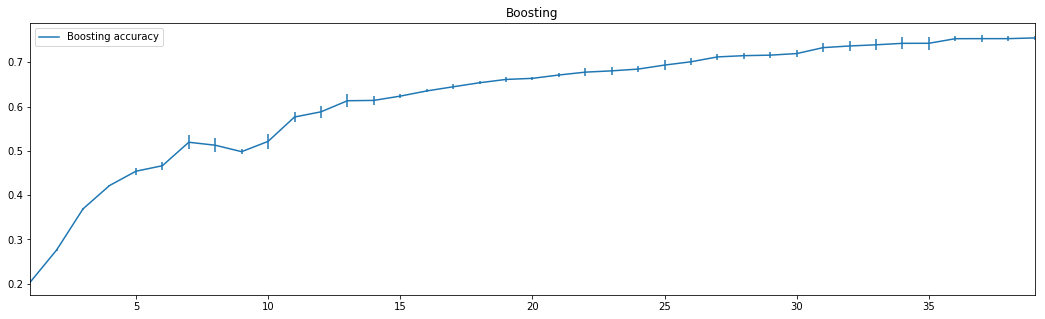

In [25]:
df_boosting.plot(y='Boosting accuracy',yerr='Boosting error',title='Boosting',figsize = (18,5))

In [21]:
# Use chosen model to predict and store the prediction.
new_test['Prediction Boosting'] = clf_boosting.predict(new_test.iloc[:,0:196])

In [22]:
new_test

,0,1,2,3,4,5,6,7,8,9,...,188,189,190,191,192,193,194,195,Prediction KNN,Prediction Boosting
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,9
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,143.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,7
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3


## Neural Networks

In [22]:
!pip install keras

  Running setup.py bdist_wheel for keras: started
  Running setup.py bdist_wheel for keras: finished with status 'done'
  Stored in directory: C:\Users\zouji\AppData\Local\pip\Cache\wheels\f6\c5\63\97d96b41bf822858027c70b04448c19deaccf1cf518148fa82
  Running setup.py bdist_wheel for theano: started
  Running setup.py bdist_wheel for theano: finished with status 'done'
  Stored in directory: C:\Users\zouji\AppData\Local\pip\Cache\wheels\96\2b\3d\71d54e24a7171a4afb7144d1e944a7be643b448b23a35b9937
Successfully built keras theano


Exception:
Traceback (most recent call last):
  File "C:\Program Files\Anaconda3\lib\site-packages\pip\basecommand.py", line 215, in main
    status = self.run(options, args)
  File "C:\Program Files\Anaconda3\lib\site-packages\pip\commands\install.py", line 342, in run
    prefix=options.prefix_path,
  File "C:\Program Files\Anaconda3\lib\site-packages\pip\req\req_set.py", line 784, in install
    **kwargs
  File "C:\Program Files\Anaconda3\lib\site-packages\pip\req\req_install.py", line 851, in install
    self.move_wheel_files(self.source_dir, root=root, prefix=prefix)
  File "C:\Program Files\Anaconda3\lib\site-packages\pip\req\req_install.py", line 1064, in move_wheel_files
    isolated=self.isolated,
  File "C:\Program Files\Anaconda3\lib\site-packages\pip\wheel.py", line 345, in move_wheel_files
    clobber(source, lib_dir, True)
  File "C:\Program Files\Anaconda3\lib\site-packages\pip\wheel.py", line 316, in clobber
    ensure_dir(destdir)
  File "C:\Program Files\Anaconda3\lib

In [31]:
!pip install tensorflow

    100% |████████████████████████████████| 39.4MB 13kB/s eta 0:00:011   36% |███████████▌                    | 14.2MB 2.0MB/s eta 0:00:13    89% |████████████████████████████▋   | 35.2MB 4.1MB/s eta 0:00:02
    100% |████████████████████████████████| 368kB 1.1MB/s ta 0:00:01


In [94]:
testX = new_train.ix[:,0:]
# scaling
trainX /= 255 # half of the max 510 
testX /= 255

In [96]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
trainY = np_utils.to_categorical(trainY, 10)

In [97]:
# Set nnet parameters
nnet = Sequential()
nnet.add(Dense(128, activation='relu', input_dim=196))
nnet.add(Dropout(0.5))
nnet.add(Dense(10, activation='softmax'))

In [98]:
nnet.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [99]:
# Fit the model.
nnet.fit(trainX, trainY, 
          batch_size=32, nb_epoch=10, verbose=1, validation_split = 0.05)

Train on 39900 samples, validate on 2100 samples
Epoch 1/10
39900/39900 [==============================] - 4s - loss: 0.5537 - acc: 0.8326 - val_loss: 0.2551 - val_acc: 0.9319

In [100]:
# Evaluate model and check the accuracy.
scores = nnet.evaluate(trainX, trainY)
print ("%s: %.2f%%" % (nnet.metrics_names[1], scores[1]*100))

41824/42000 [============================>.] - ETA: 0s

In [64]:
# Check the format of prediction for next step.
test_array = np.array(new_test.iloc[:,0:196])
test_array

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [68]:
# Store the prediction result.
new_test['Prediction Neural Nets'] = None
for i in range(len(test_array)):
    pred = nnet.predict(np.array(new_test.iloc[:,0:196]))[i]
    for j in range(10):
        if pred[j]==1:
            new_test.loc[i,'Prediction Neural Nets'] = j
        else:
            pass

In [69]:
new_test

,0,1,2,3,4,5,6,7,8,9,...,189,190,191,192,193,194,195,Prediction KNN,Prediction Boosting,Prediction Neural Nets
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,4,9
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,9,9
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,3
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,7,7
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,3
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,3


# Classification Tree

In [22]:
# separate training data into X and Y
trainY = new_train.ix[:,0].values.astype('int32') # label
trainX =(new_train.ix[:,1:].values).astype('float32')

In [23]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [24]:
# Fit the model with a good enough max_depth.
clf = tree.DecisionTreeClassifier(max_depth=20)
clf = clf.fit(trainX, trainY)

In [104]:
# Check the accuracy and standard deviation of the model.
print('Classification Tree\n' +
      'Mean:' + str(cross_val_score(clf, trainX, trainY, cv=5).mean()) +'\n' + 
      'Standard Deviation:' + str(cross_val_score(clf, trainX, trainY, cv=5).std()))

Classification Tree
Mean:0.869618300064
Standard Deviation:0.00227104435726


In [105]:
# Use the model to predict and store the predictions.
new_test['Prediction Classification Tree']=clf.predict(new_test.iloc[:,0:196])

In [106]:
new_test

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,Prediction KNN,Prediction Boosting,Prediction Neural Nets,Prediction Classification Tree
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9,4,9,9
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9,9,9,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,2,3,2
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7,7,7,7
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,3,3,3
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,3,3,3


# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
# Use different n_estmators value to find the best model.
results = []
n_range = range(1,40,1)
for n in n_range:
    clf_rf = RandomForestClassifier(max_features="sqrt", n_estimators=n, max_depth=20)
    clf_rf_scores = cross_val_score(clf_rf, trainX, trainY, cv=5)
    results.append((n,clf_rf_scores.mean(),clf_rf_scores.std()))
df_accuracy = pd.DataFrame(data=results,columns=['n','RF accuracy','RF error'])

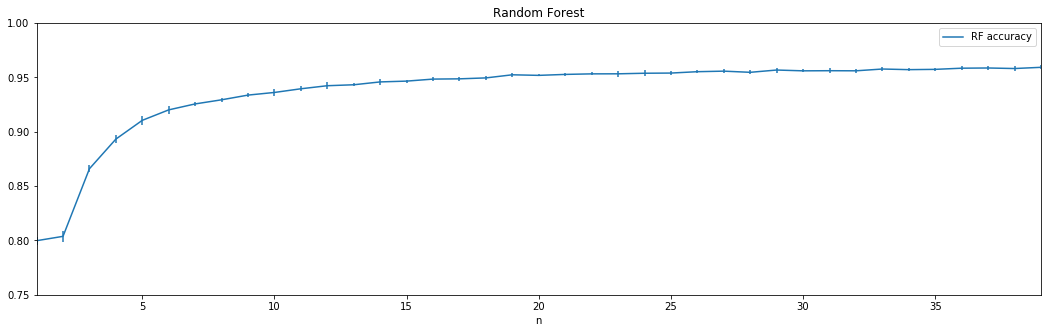

In [21]:
df_accuracy.plot(x='n',y='RF accuracy',ylim=[0.75,1],yerr='RF error',title='Random Forest',figsize = (18,5))

In [108]:
# Fit the model with best value of parameters.
clf_rf = RandomForestClassifier(max_features="sqrt", n_estimators=40, max_depth=20)
clf_rf = clf_rf.fit(trainX, trainY)

In [31]:
# Check the accuracy and standard deviation.
print('Random Forests\n' + 
      'Mean:' + str(cross_val_score(clf_rf, trainX, trainY, cv=5).mean()) +'\n' + 
      'Standard Deviation:' + str(cross_val_score(clf_rf, trainX, trainY, cv=5).std()))

Random Forests
Mean:0.959333196126
Standard Deviation:0.00123920151443


In [109]:
# Use the model to predict and store the results.
new_test['Prediction Random Forest'] = clf_rf.predict(new_test.iloc[:,0:196])

In [110]:
new_test

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,Prediction KNN,Prediction Boosting,Prediction Neural Nets,Prediction Classification Tree,Prediction Random Forest
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9,4,9,9,9
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9,9,9,4,9
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3,2,3,2,3
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7,7,7,7,7
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3,3,3,3,3
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3,3,3,3,3


In [55]:
# Save current result for convenience.
new_test.to_csv("new_test.csv", sep=' ')

## Model Comparison

In [12]:
# Load result and format the file.
new_test = pd.read_csv('new_test.csv',sep=' ')
new_test = new_test.iloc[:,1:]

In [13]:
new_test
# we deduct the dimension of test dataset, storing as new_test.
# new_test has 196 features for each row 

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,Prediction KNN,Prediction Boosting,Prediction Neural Nets,Prediction Classification Tree,Prediction Random Forest
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,2,2.0,2,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9,4,9.0,9,9
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9,9,9.0,4,9
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3,2,3.0,2,3
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7,7,7.0,7,7
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3,3,3.0,3,3
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3,3,3.0,3,3


In [14]:
# Find the examples which the three most accurate models have different predictions. 
results = []
for i in range(len(new_test)):
    if new_test.loc[i,'Prediction KNN'] != new_test.loc[i,'Prediction Neural Nets']:
        results.append(i) 
    elif new_test.loc[i,'Prediction KNN'] != new_test.loc[i,'Prediction Random Forest']:
        results.append(i)
    elif new_test.loc[i,'Prediction Neural Nets'] != new_test.loc[i,'Prediction Random Forest']:
        results.append(i)
    else:
        pass    

In [40]:
# Subset the examples that cannot be sure.
notsure_df = new_test.loc[results,:]

In [41]:
notsure_df

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,Prediction KNN,Prediction Boosting,Prediction Neural Nets,Prediction Classification Tree,Prediction Random Forest
76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8,3,8.0,5,3
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4,4,9.0,4,4
101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9,3,3.0,3,3
109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8,4,8.0,8,9
118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3,5,5.0,9,3
128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7,5,8.0,4,8
172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8,9,8.0,9,9
181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8,8,2.0,7,8
214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3,7,3.0,3,7
223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,5,2.0,2,2


In [42]:
notsure_df.to_csv("notsure.csv", sep=' ')

## Predict Test Data

In [43]:
notsure_df = notsure_df.dropna()

In [44]:
notsure_df['Prediction Neural Nets'] = notsure_df['Prediction Neural Nets'].astype(int)
notsure_df['Final_label'] = np.nan

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [45]:
predict_final = notsure_df.ix[:,['Prediction KNN','Prediction Boosting','Prediction Neural Nets','Prediction Classification Tree','Prediction Random Forest']]

In [46]:
predict_final

,Prediction KNN,Prediction Boosting,Prediction Neural Nets,Prediction Classification Tree,Prediction Random Forest
76,8,3,8,5,3
81,4,4,9,4,4
101,9,3,3,3,3
109,8,4,8,8,9
118,3,5,5,9,3
128,7,5,8,4,8
172,8,9,8,9,9
181,8,8,2,7,8
214,3,7,3,3,7
223,0,5,2,2,2


In [47]:
from scipy.stats import mode

In [49]:
# Generate a new column namedd "Final_lable": 
# Within the five prediction results of each image, if there exist similar predictions, use mode to be the final_label;
# If all the five predictions are different, use the result of KNN (the most precise method) to be the final_label.
for which_image in predict_final.index:
    select = predict_final.ix[which_image,:]
    if len(np.unique(select)) < 5:
        notsure_df.ix[which_image,'Final_label'] = int(mode(select)[0])
    else:
        notsure_df.ix[which_image,'Final_label'] = select['Prediction KNN']
notsure_df['Final_label'] = notsure_df['Final_label'].astype(int)

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [50]:
notsure_df

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,Prediction KNN,Prediction Boosting,Prediction Neural Nets,Prediction Classification Tree,Prediction Random Forest,Final_label
76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8,3,8,5,3,3
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4,4,9,4,4,4
101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9,3,3,3,3,3
109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8,4,8,8,9,8
118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3,5,5,9,3,3
128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7,5,8,4,8,8
172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8,9,8,9,9,9
181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8,8,2,7,8,8
214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3,7,3,3,7,3
223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,5,2,2,2,2


In [51]:
# Find the first 20 examples for plotting in next step.
rows = notsure_df.index[0:20].values
rows

array([ 76,  81, 101, 109, 118, 128, 172, 181, 214, 223, 246, 249, 259,
       275, 287, 341, 359, 408, 409, 450], dtype=int64)

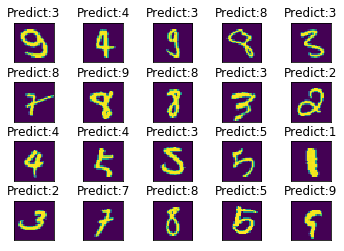

In [52]:
# Put the Final_label as title of each image
# The image shows the true number; the title shows the predicted result.
# It shows that majority of numbers are correctly predicted.
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.subplots_adjust(hspace = 0.5)
    row = rows[i]
    plt.imshow(test.iloc[row,:].values.reshape(28,28), interpolation = "none")
    plt.gca().set_title('Predict:' + str(notsure_df.ix[row,'Final_label']))
    plt.xticks([])
    plt.yticks([])

## Put predictions into the test dataset

In [53]:
# Create a new column to store predictions
test['Prediction'] = None

In [55]:
# Put all predictions of KNN model, which is very accurate.
test.loc[:,'Prediction'] = new_test.loc[:,'Prediction KNN']

In [56]:
# Replace those unsure value with checked prediction values
for i in notsure_df.index.values:
    test.loc[i,'Prediction'] = notsure_df.loc[i,'Final_label']

In [59]:
# Show the result
test['Prediction'] = test['Prediction'].astype(int)

In [60]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,Prediction
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [33]:
# Create a file to put final result as shown in the example
ImageID = np.arange(1,28001,1).reshape(28000,1)
Submission = pd.DataFrame(ImageID,columns = ['ImageID'])
Submission['Label'] = test['Prediction'] 
Submission.to_csv("Submission.csv", sep=' ')

# ALL SET